In [1]:
## This notebook is a weekend dump for me just trying out and looking for the best techniques to sample data to prevent
## 

In [247]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Dead-Reackoning-Processed.csv')

In [10]:
x = df['location-lat']
y = df['location-long']

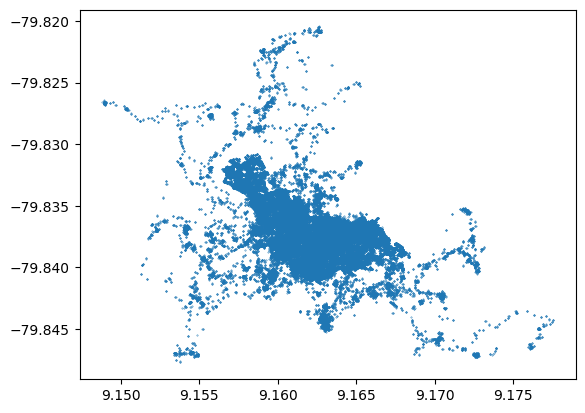

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=0.1)

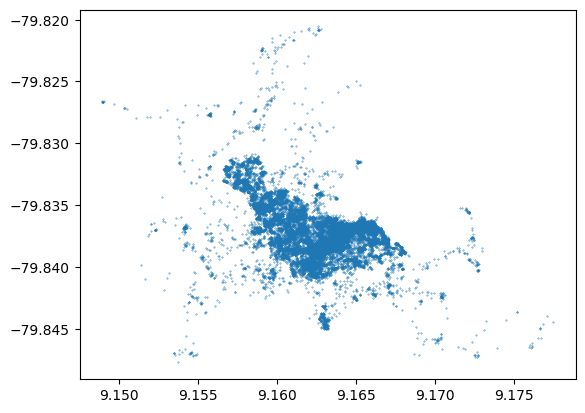

In [248]:
df2 = pd.read_csv('data/Dead-Reackon-Sample.csv')
x = df2['location-lat']
y = df2['location-long']
plt.scatter(x, y, s=0.1)

In [249]:
df = pd.read_csv('data/Dead-Reackoning-Processed.csv')
df_use = df[['location-lat', 'location-long']]

In [250]:
a = df_use.diff().abs().rename(columns={
    'location-lat': 'lat-diff',
    'location-long': 'long-diff'
})

In [98]:
df_new = pd.concat([df_use, a, df.timestamp], axis = 1)

In [108]:
(df_new['lat-diff'] ).max()

0.014794099999999588

In [111]:
diff_u = pd.unique(df_new['lat-diff'])

In [194]:
my_dict = {}
for val in diff_u:
    a = ((df_new['lat-diff'] > val).sum())
    if(a <= 100000):
        my_dict.update({val: a})

In [195]:
# Get the key with the maximum value
max_key = max(my_dict, key=my_dict.get)

# Print the result
print(max_key)

1.089999999948077e-05


In [187]:
my_dict[3.0399999999985994e-05]

49996

In [196]:
df_new_latest = df_new[df_new['lat-diff'] > max_key]

In [197]:
df_new_latest

,location-lat,location-long,lat-diff,long-diff
1,9.165251,-79.836838,0.000016,0.000018
2,9.165222,-79.836564,0.000028,0.000273
3,9.165467,-79.836666,0.000245,0.000102
6,9.158810,-79.837279,0.006647,0.000680
9,9.158835,-79.837318,0.000024,0.000041
...,...,...,...,...
498794,9.158638,-79.834687,0.000011,0.000013
498796,9.158738,-79.834374,0.000091,0.000320
498798,9.158716,-79.834396,0.000014,0.000010
498802,9.158481,-79.834471,0.000214,0.000062


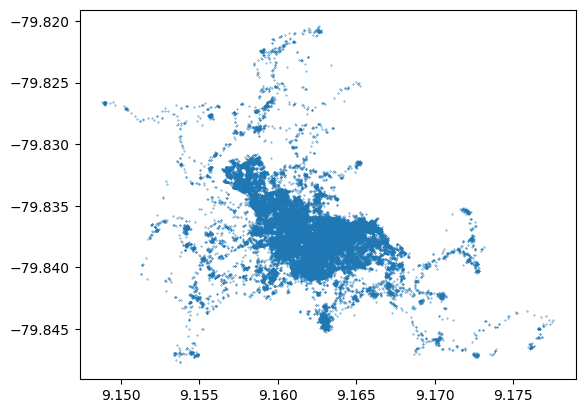

In [198]:
x = df_new_latest['location-lat']
y = df_new_latest['location-long']
plt.scatter(x, y, s=0.1)